# Crop Prediction Notebook

#### This notebook performs crop prediction based on environmental factors using various machine learning models.
#### It evaluates multiple models, selects the best one based on accuracy, and saves the trained model for future predictions.


## 1. Import Necessary Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle # Import pickle to save and load models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')

## 2. Importing Data

In [2]:
# ## 2. Load the Dataset

# Make sure to upload the 'Crop_recommendation.csv' dataset to your Kaggle or Google Colab environment.
# The path below assumes the dataset is in the default input directory on Kaggle.
try:
    crop_df = pd.read_csv('/kaggle/input/crop-fertilizer-dataset/crop_recommendation.csv')
except FileNotFoundError:
    print("Dataset not found. Please ensure 'Crop_recommendation.csv' is in the correct directory.")
    # You might need to adjust the path for Google Colab or other environments
    # For Google Colab, you can upload the file or mount your Google Drive
    # from google.colab import files
    # uploaded = files.upload()
    # for fn in uploaded.keys():
    #   print('User uploaded file "{name}" with length {length} bytes'.format(
    #       name=fn, length=len(uploaded[fn])))
    # import io
    # crop_df = pd.read_csv(io.StringIO(uploaded['Crop_recommendation.csv'].decode('utf-8')))


## 3. Data Exploration and Preprocessing

In [3]:
# Display the first few rows
print("First 5 rows of the dataset:")
crop_df.head()

First 5 rows of the dataset:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
# Check the shape of the dataset
print("\nShape of the dataset:", crop_df.shape)



Shape of the dataset: (2200, 8)


In [5]:
# Get basic info about the dataset
print("\nDataset Info:")
crop_df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(crop_df.isnull().sum())


Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [7]:
# Check for duplicated values
print("\nNumber of duplicated rows:", crop_df.duplicated().sum())



Number of duplicated rows: 0


In [8]:
# Display descriptive statistics
print("\nDescriptive statistics:")
crop_df.describe()


Descriptive statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## 4. Exploring Data

In [9]:
# Check the distribution of the target variable ('label')
print("\nDistribution of Crop Labels:")
crop_df['label'].value_counts()


Distribution of Crop Labels:


label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [10]:
features = crop_df.columns.to_list()
features.remove('label')
features

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

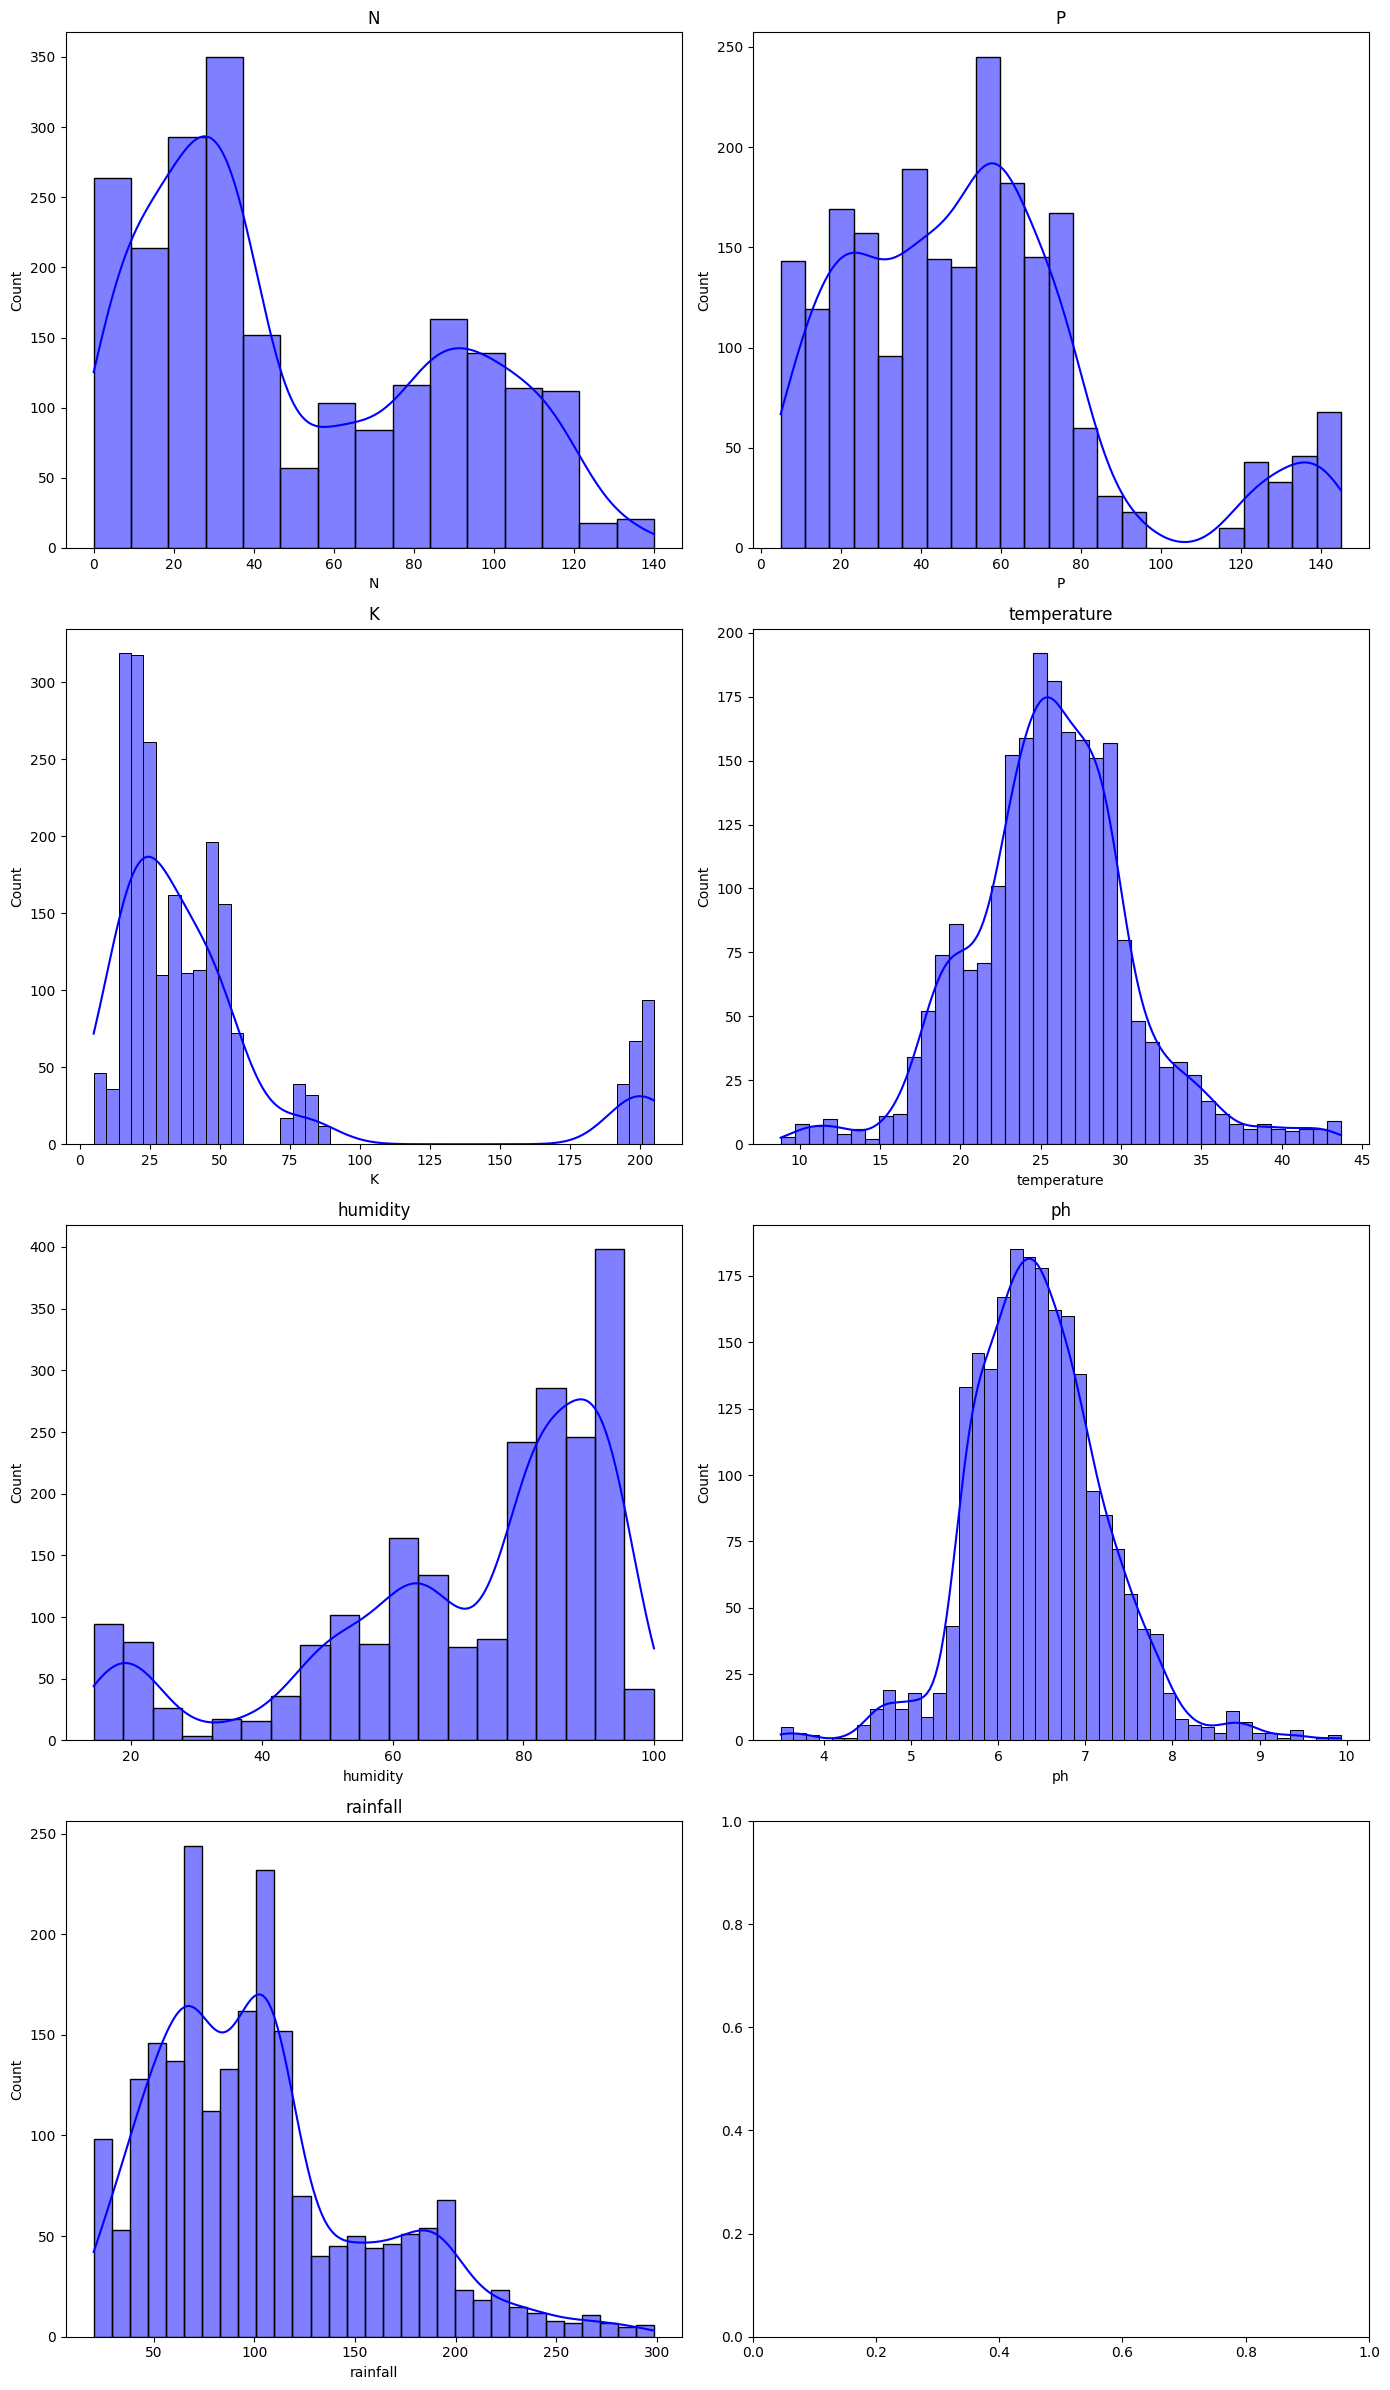

In [11]:
# Visualize the distribution of numerical features using histograms
# crop_df.hist(figsize=(15, 15), color='#5cb85c') # Using a different color
# plt.suptitle('Distribution of Numerical Features', y=1.02)
# plt.tight_layout()
# plt.show()

# visualize the distribution of each feature
fig, ax = plt.subplots(4, 2, figsize=(14, 24))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop_df[i], ax=subplot, kde=True, color='blue')
    subplot.set_title(i)
plt.tight_layout()
plt.show()

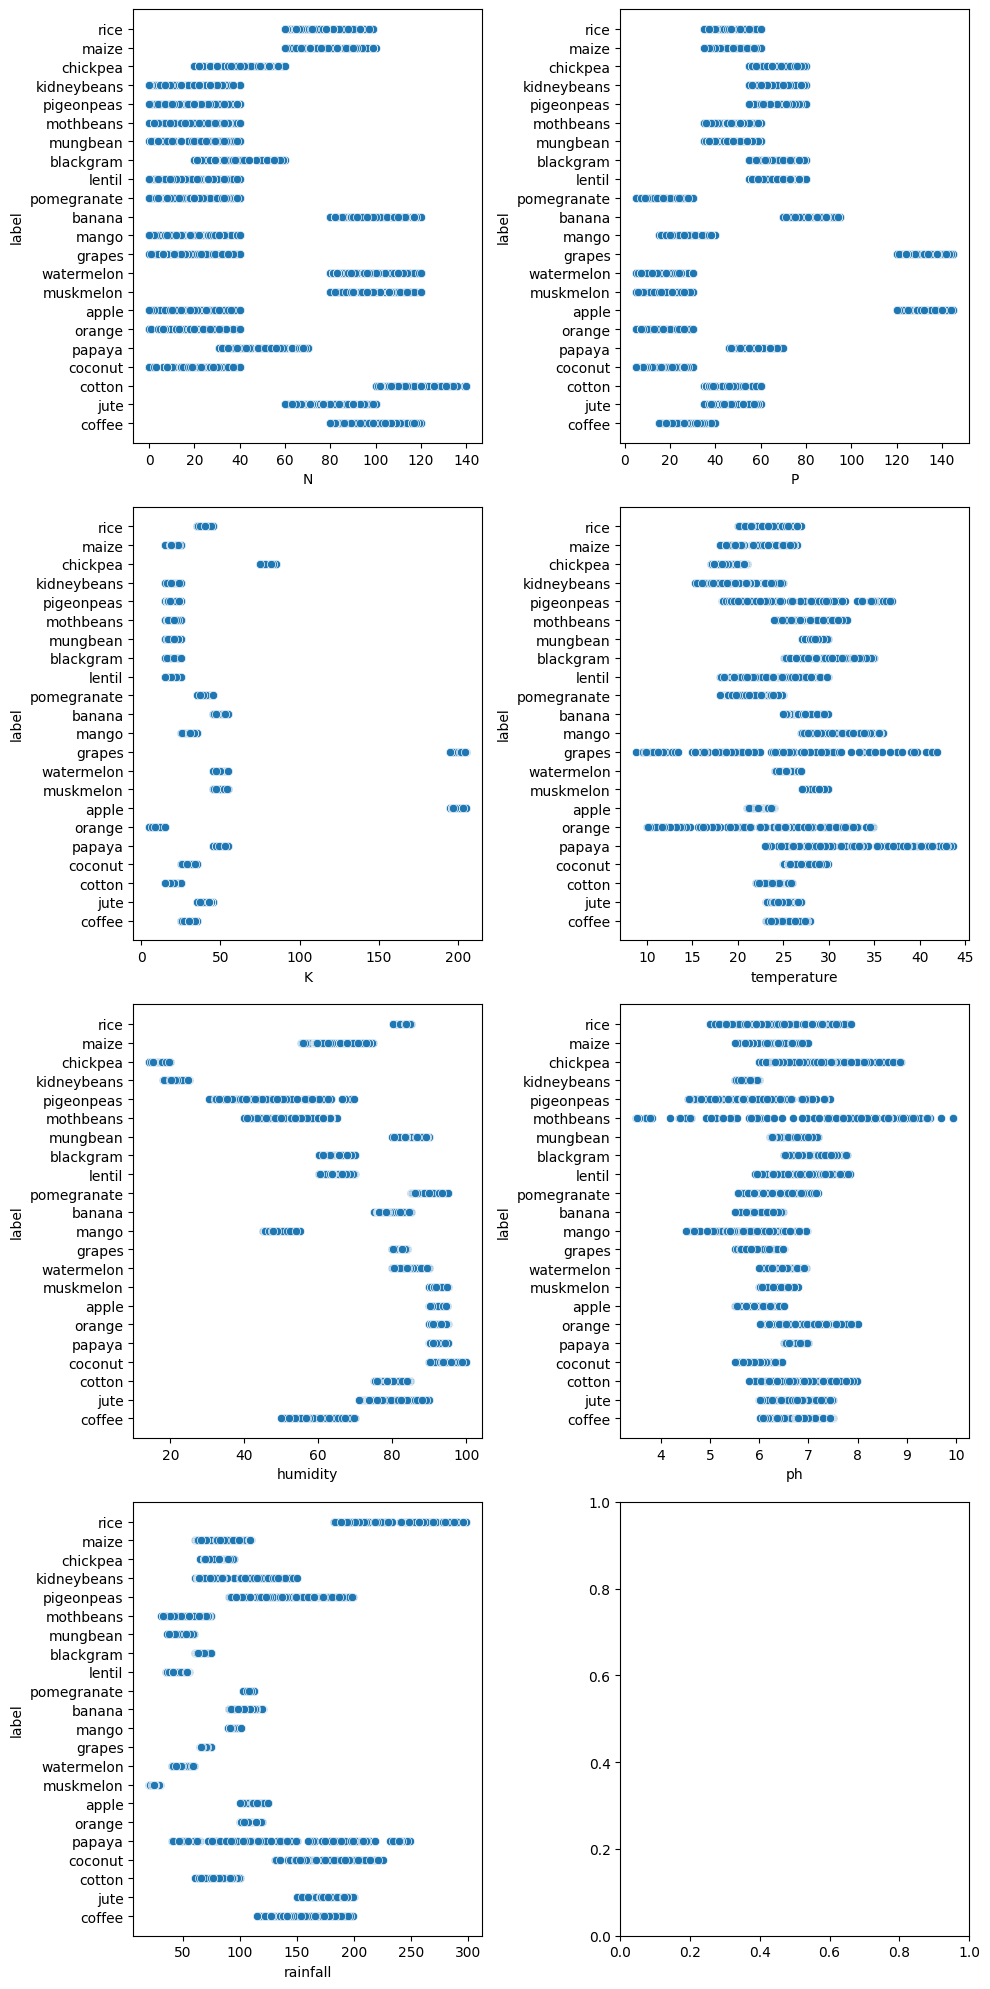

In [12]:
# plot scatter plot of each feature against the target
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop_df, ax=subplot)
plt.tight_layout()
plt.show()

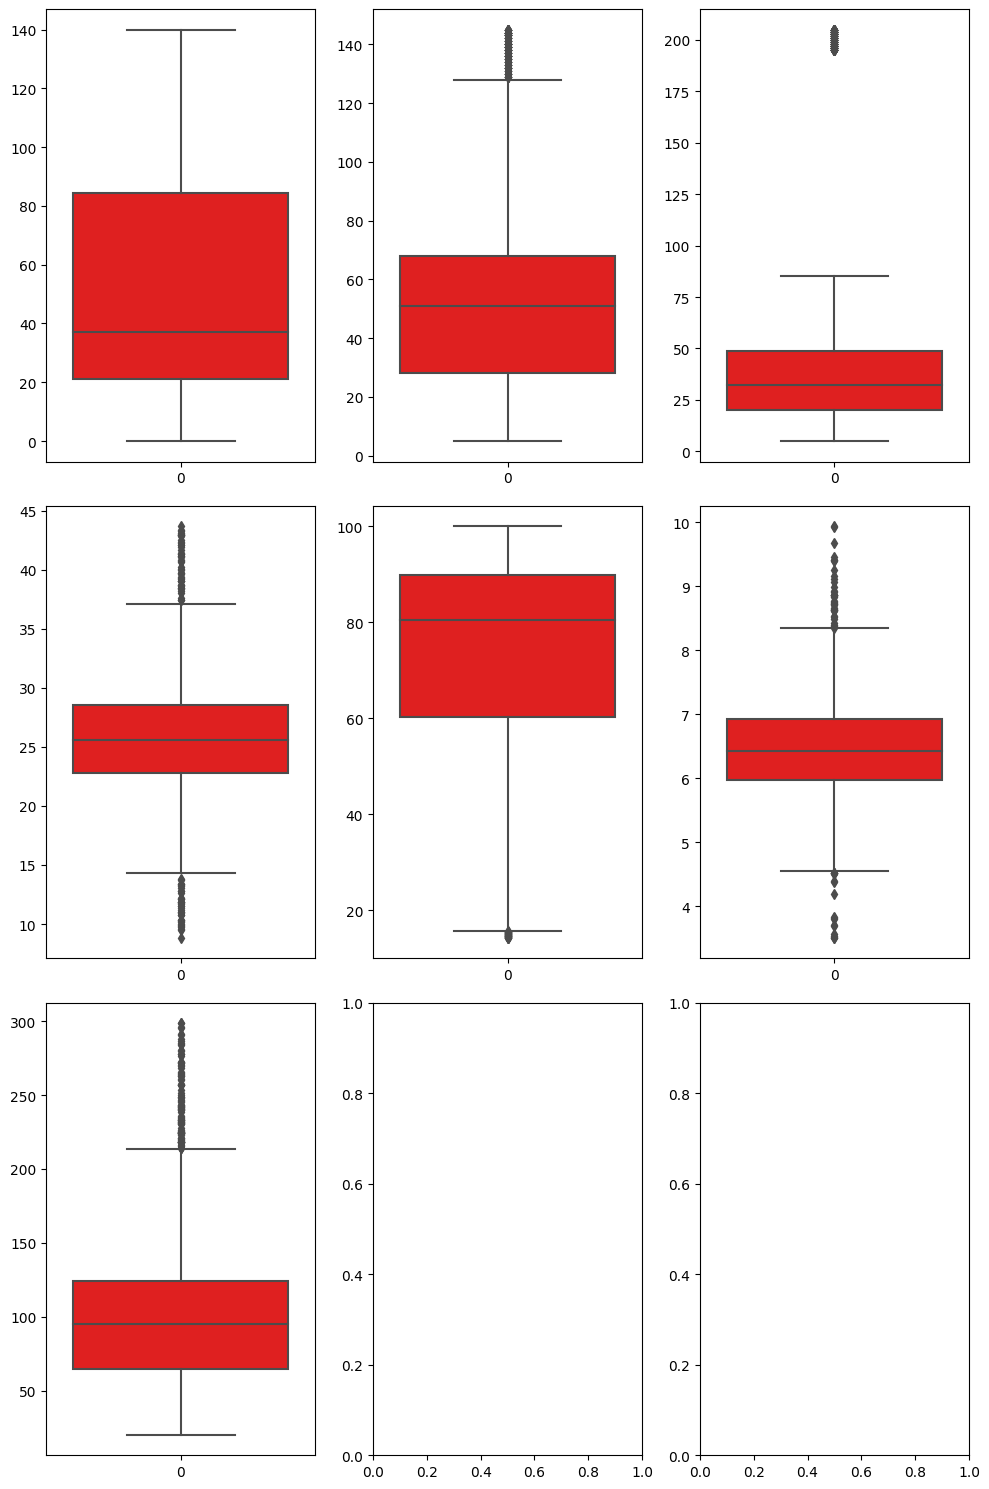

In [13]:
# create box plot for each feature to check for outliers
fig, ax = plt.subplots(3, 3, figsize=(10, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop_df[i], ax=subplot, color = 'red')
plt.tight_layout()
plt.show()

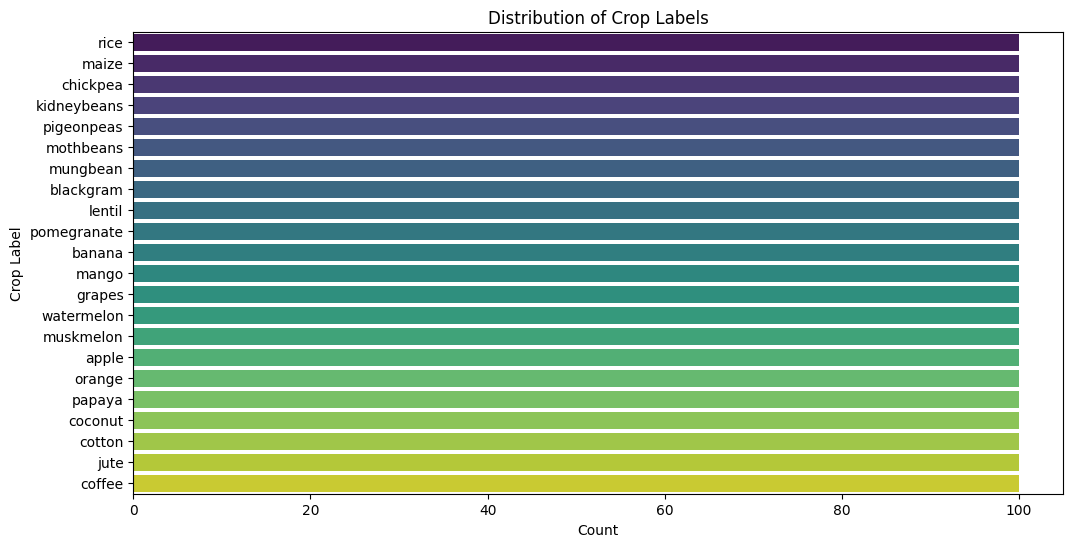

In [14]:

# Visualize the distribution of the target variable using a countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=crop_df, y='label', palette='viridis') # Using a different color palette
plt.title('Distribution of Crop Labels')
plt.xlabel('Count')
plt.ylabel('Crop Label')
plt.show()

In [15]:
# check the correlation of the features
numeric_columns = crop_df.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


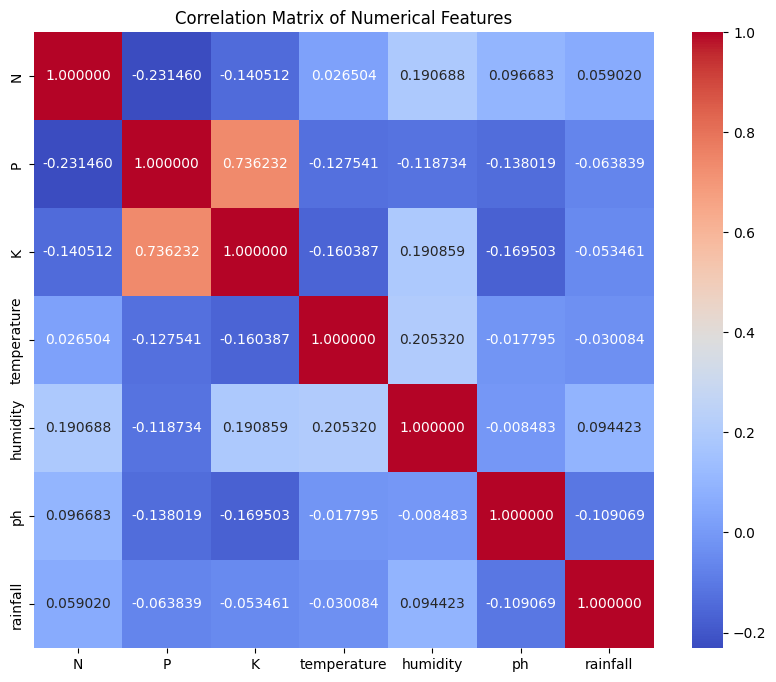

In [16]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(crop_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".6f") # Using a different colormap
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## 5. Encoding

In [17]:
# Separate features (X) and target (y)
X = crop_df.drop('label', axis=1)
y = crop_df['label']

In [18]:
# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## 6. Split and Scaling the Dataset

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Shape of x_train: {X_train.shape}")
print(f"Shape of y_train: {y_train_encoded.shape}")
print(f"Shape of x_test: {X_test.shape}")
print(f"Shape of y_test: {y_test_encoded.shape}")


Shape of x_train: (1760, 7)
Shape of y_train: (1760,)
Shape of x_test: (440, 7)
Shape of y_test: (440,)


In [20]:
# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 7. Train and Evaluate Multiple Models

In [21]:
# Initialize multiple classification models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNeighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Extra Tree": ExtraTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging Classifier": BaggingClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_scores = {}

In [22]:
# Train and evaluate each model
print("\nTraining and evaluating models:")
for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    accuracy_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.6f}")


Training and evaluating models:
Logistic Regression Accuracy: 0.963636
Naive Bayes Accuracy: 0.995455
SVM Accuracy: 0.968182
KNeighbors Classifier Accuracy: 0.956818
Decision Tree Accuracy: 0.984091
Extra Tree Accuracy: 0.925000
Random Forest Accuracy: 0.993182
Bagging Classifier Accuracy: 0.984091
Gradient Boosting Accuracy: 0.981818
AdaBoost Classifier Accuracy: 0.140909


## 8. Select the Best Model

In [23]:
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

print(f"\nBest performing model: {best_model_name} with accuracy {accuracy_scores[best_model_name]:.4f}")



Best performing model: Naive Bayes with accuracy 0.9955


In [24]:
# Evaluate the best model in more detail
y_pred_best = best_model.predict(X_test_scaled)
print(f"\nClassification Report for {best_model_name}:\n", classification_report(y_test_encoded, y_pred_best, target_names=label_encoder.classes_))



Classification Report for Naive Bayes:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1

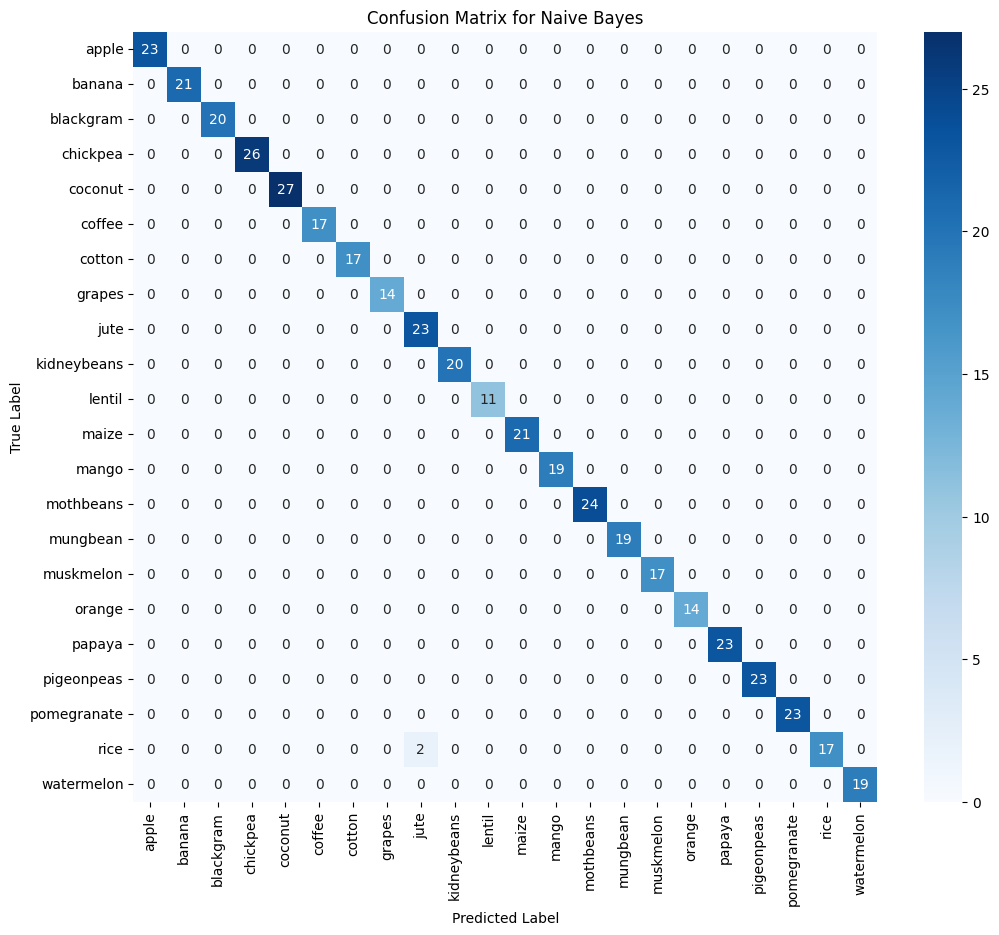

In [25]:
# Confusion Matrix for the best model
cm = confusion_matrix(y_test_encoded, y_pred_best)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix for {best_model_name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 9. Save the Best Model and Scaler


In [26]:
# Save the trained best model
model_filename = 'best_crop_model.sav'
pickle.dump(best_model, open(model_filename, 'wb'))
print(f"\nBest model saved as {model_filename}")


Best model saved as best_crop_model.sav


In [27]:
# Save the fitted scaler
scaler_filename = 'crop_scaler.sav'
pickle.dump(scaler, open(scaler_filename, 'wb'))
print(f"Scaler saved as {scaler_filename}")

Scaler saved as crop_scaler.sav


In [28]:
# Save the label encoder classes
label_encoder_filename = 'crop_label_encoder.sav'
pickle.dump(label_encoder, open(label_encoder_filename, 'wb'))
print(f"Label encoder saved as {label_encoder_filename}")


Label encoder saved as crop_label_encoder.sav


## 10. Load the Saved Model and Make Predictions


In [29]:

# Example of how to load the saved model and scaler for new predictions
# Load the model
loaded_model = pickle.load(open('best_crop_model.sav', 'rb'))

# Load the scaler
loaded_scaler = pickle.load(open('crop_scaler.sav', 'rb'))

# Load the label encoder
loaded_label_encoder = pickle.load(open('crop_label_encoder.sav', 'rb'))


In [30]:
# Example prediction with new data (replace with your input values)
# N, P, K, temperature, humidity, ph, rainfall
new_data = np.array([[90, 42, 43, 20.879744, 82.002744, 6.502985, 202.935536]])


In [31]:
# Scale the new data using the loaded scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Make a prediction
predicted_label_encoded = loaded_model.predict(new_data_scaled)

# Decode the predicted label
predicted_label = loaded_label_encoder.inverse_transform(predicted_label_encoded)

print(f"\nPrediction  -  new data :- {new_data}")
print(f"\nCrop Name for new data :{predicted_label[0]}")


Prediction  -  new data :- [[ 90.        42.        43.        20.879744  82.002744   6.502985
  202.935536]]

Crop Name for new data :rice
